In [1]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini 2.0 Flash Image Generation in Vertex AI

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fgetting-started%2Fintro_gemini_2_0_image_gen.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/getting-started/intro_gemini_2_0_image_gen.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| Authors |
| --- |
| [Nikita Namjoshi](https://github.com/nikitamaia) |
| [Katie Nguyen](https://github.com/katiemn) |

## Overview

Gemini 2.0 Flash supports image generation and editing. This enables you to converse with Gemini and create images with interwoven text.

In this tutorial, you learn how to use Gemini 2.0 Flash image generation features in Vertex AI using the Google Gen AI SDK.

You'll try out the following scenarios:
* Image generation:
  * Text to image
  * Text to image and text (interleaved)
* Image editing:
  * Text and image to image
  * Multi-turn image editing
  * Images and text to image and text (interleaved)

## Get started

### Install Google Gen AI SDK for Python

In [2]:
%pip install --upgrade --quiet google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.4/206.4 kB 8.0 MB/s eta 0:00:00


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.

In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [4]:
from IPython.display import Image, Markdown, display
from google import genai
from google.genai.types import GenerateContentConfig, Part

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [5]:
import os

PROJECT_ID = "lunee-mvp-463310"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = "global"

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Load the image model

Gemini 2.0 Flash image generation: `gemini-2.0-flash-preview-image-generation`

In [6]:
MODEL_ID = "gemini-2.0-flash-preview-image-generation"

## Image generation

First, send a text prompt to Gemini 2.0 Flash describing the image you want to generate.


### Text to image

In the cell below, you'll call the `generate_content` method and pass in the following arguments:

* `model`: The ID of the model you want to use
* `contents`: this is your prompt, in this case a text only user message describing the image to be generated
*`config`: A config for specifying content settings
  * `response_modalities`: in this case `TEXT` and `IMAGE`, if you do not specify `IMAGE`, you will not get image output and `IMAGE` only is not allowed
  * `candidate_count`: the number of candidates to generate
  * `safety_settings`:
    * `method`: HARM_BLOCK_METHOD_UNSPECIFIED, SEVERITY, PROBABILITY
    * `category`: HARM_CATEGORY_UNSPECIFIED, HARM_CATEGORY_HATE_SPEECH, HARM_CATEGORY_DANGEROUS_CONTENT, HARM_CATEGORY_HARASSMENT, HARM_CATEGORY_SEXUALLY_EXPLICIT, HARM_CATEGORY_CIVIC_INTEGRITY
    * `threshold`: HARM_BLOCK_THRESHOLD_UNSPECIFIED, BLOCK_LOW_AND_ABOVE, BLOCK_MEDIUM_AND_ABOVE, BLOCK_ONLY_HIGH, BLOCK_NONE, OFF

All generated images include a [SynthID watermark](https://deepmind.google/technologies/synthid/), which can be verified via the Media Studio in [Vertex AI Studio](https://cloud.google.com/generative-ai-studio?hl=en).

/usr/local/lib/python3.11/dist-packages/google/genai/_common.py:291: UserWarning: HARM_CATEGORY_IMAGE_HATE is not a valid HarmCategory
  warnings.warn(f"{value} is not a valid {cls.__name__}")
/usr/local/lib/python3.11/dist-packages/google/genai/_common.py:291: UserWarning: HARM_CATEGORY_IMAGE_HARASSMENT is not a valid HarmCategory
  warnings.warn(f"{value} is not a valid {cls.__name__}")
/usr/local/lib/python3.11/dist-packages/google/genai/_common.py:291: UserWarning: HARM_CATEGORY_IMAGE_DANGEROUS_CONTENT is not a valid HarmCategory
  warnings.warn(f"{value} is not a valid {cls.__name__}")
/usr/local/lib/python3.11/dist-packages/google/genai/_common.py:291: UserWarning: HARM_CATEGORY_IMAGE_SEXUALLY_EXPLICIT is not a valid HarmCategory
  warnings.warn(f"{value} is not a valid {cls.__name__}")


A cute boy character in a classic Disney animation style will be depicted, gently hugging his well-loved, slightly worn teddy bear doudou. The scene will have a soft, warm color palette, typical of Disney films, and the characters will have expressive, endearing features.



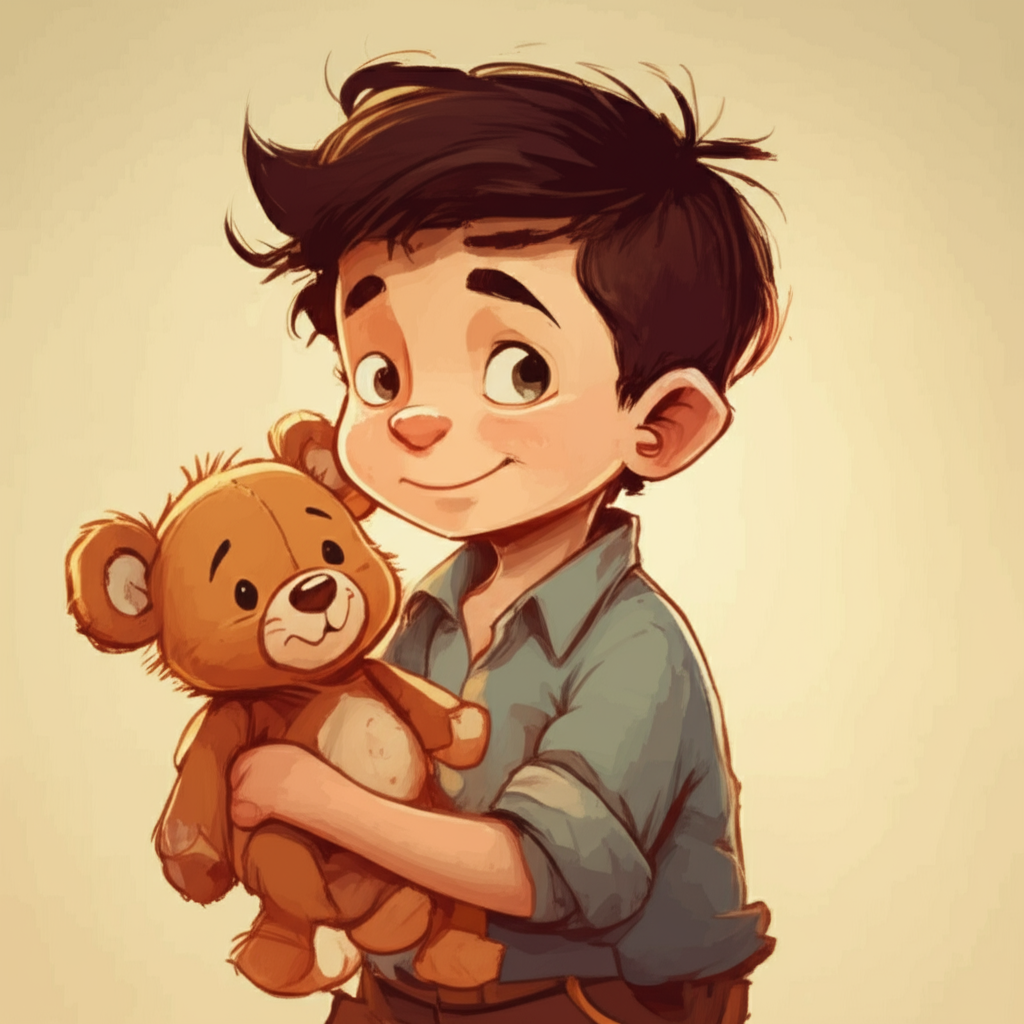

In [7]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="generate an image of a boy character in disney style with his bear doudou",
    config=GenerateContentConfig(
        response_modalities=["TEXT", "IMAGE"],
        candidate_count=1,
        safety_settings=[
            {"method": "PROBABILITY"},
            {"category": "HARM_CATEGORY_DANGEROUS_CONTENT"},
            {"threshold": "BLOCK_MEDIUM_AND_ABOVE"},
        ],
    ),
)

for part in response.candidates[0].content.parts:
    if part.text:
        display(Markdown(part.text))
    if part.inline_data:
        display(Image(data=part.inline_data.data, width=350, height=350))

### Text to image and text

In addition to generating images, Gemini can generate multiple images and text in an interleaved fashion.

For example, you could ask the model to generate a recipe for banana bread with images showing different stages of the cooking process. Or, you could ask the model to generate images of different wildflowers with accompanying titles and descriptions.

Let's try out the interleaved text and image functionality by prompting Gemini 2.0 Flash to create a tutorial for assemblying a peanut butter and jelly sandwich.

You'll notice that in the prompt we ask the model to generate both text and images for each episode of the narrative. This will nudge the model to create text with images interleaved.

⚠️ **Note:** that we are asking the model to generate a lot of content in this prompt, so it will take a bit of time for this cell to finish executing.

In [30]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Create a tutorial explaining how to make a peanut butter and jelly sandwich in three easy steps. For each step, provide a title with the number of the step, an explanation, and also generate an image, generate each image in a 1:1 aspect ratio.",
    config=GenerateContentConfig(
        response_modalities=["TEXT", "IMAGE"],
        safety_settings=[
            {"method": "PROBABILITY"},
            {"category": "HARM_CATEGORY_DANGEROUS_CONTENT"},
            {"threshold": "BLOCK_MEDIUM_AND_ABOVE"},
        ],
    ),
)

for part in response.candidates[0].content.parts:
    if part.text:
        display(Markdown(part.text))
    if part.inline_data:
        display(Image(data=part.inline_data.data, width=350, height=350))

KeyboardInterrupt: 

## Image editing

You can pass text and an image to Gemini 2.0 Flash for use cases like product captions, information about a particular image, or to make edits or modifications to an existing image.

### Text and image to image

Let's try out a style transfer example and ask Gemini 2.0 Flash to create an image of this dog in a 3D cartoon rendering.

Run the next cell to visualize the starting dog image.

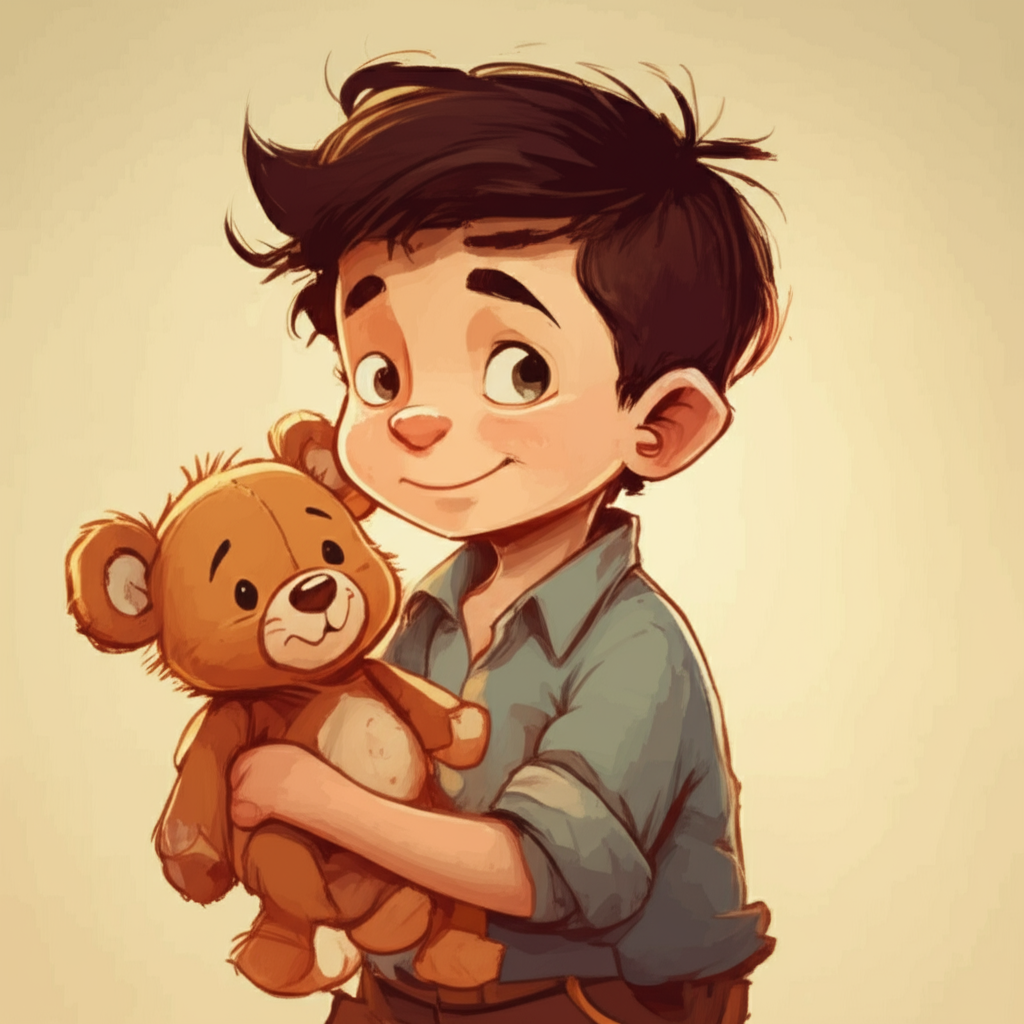

In [8]:
image_file = "/content/pic.png"
display(Image(filename=image_file, width=350, height=350))

/usr/local/lib/python3.11/dist-packages/google/genai/_common.py:291: UserWarning: HARM_CATEGORY_IMAGE_HARASSMENT is not a valid HarmCategory
  warnings.warn(f"{value} is not a valid {cls.__name__}")
/usr/local/lib/python3.11/dist-packages/google/genai/_common.py:291: UserWarning: HARM_CATEGORY_IMAGE_SEXUALLY_EXPLICIT is not a valid HarmCategory
  warnings.warn(f"{value} is not a valid {cls.__name__}")
/usr/local/lib/python3.11/dist-packages/google/genai/_common.py:291: UserWarning: HARM_CATEGORY_IMAGE_DANGEROUS_CONTENT is not a valid HarmCategory
  warnings.warn(f"{value} is not a valid {cls.__name__}")
/usr/local/lib/python3.11/dist-packages/google/genai/_common.py:291: UserWarning: HARM_CATEGORY_IMAGE_HATE is not a valid HarmCategory
  warnings.warn(f"{value} is not a valid {cls.__name__}")


I will generate an image showing the same cartoon boy with his brown teddy bear in a magical forest. A menacing lion will be facing them, and the boy and the bear will have expressions of extreme fear.



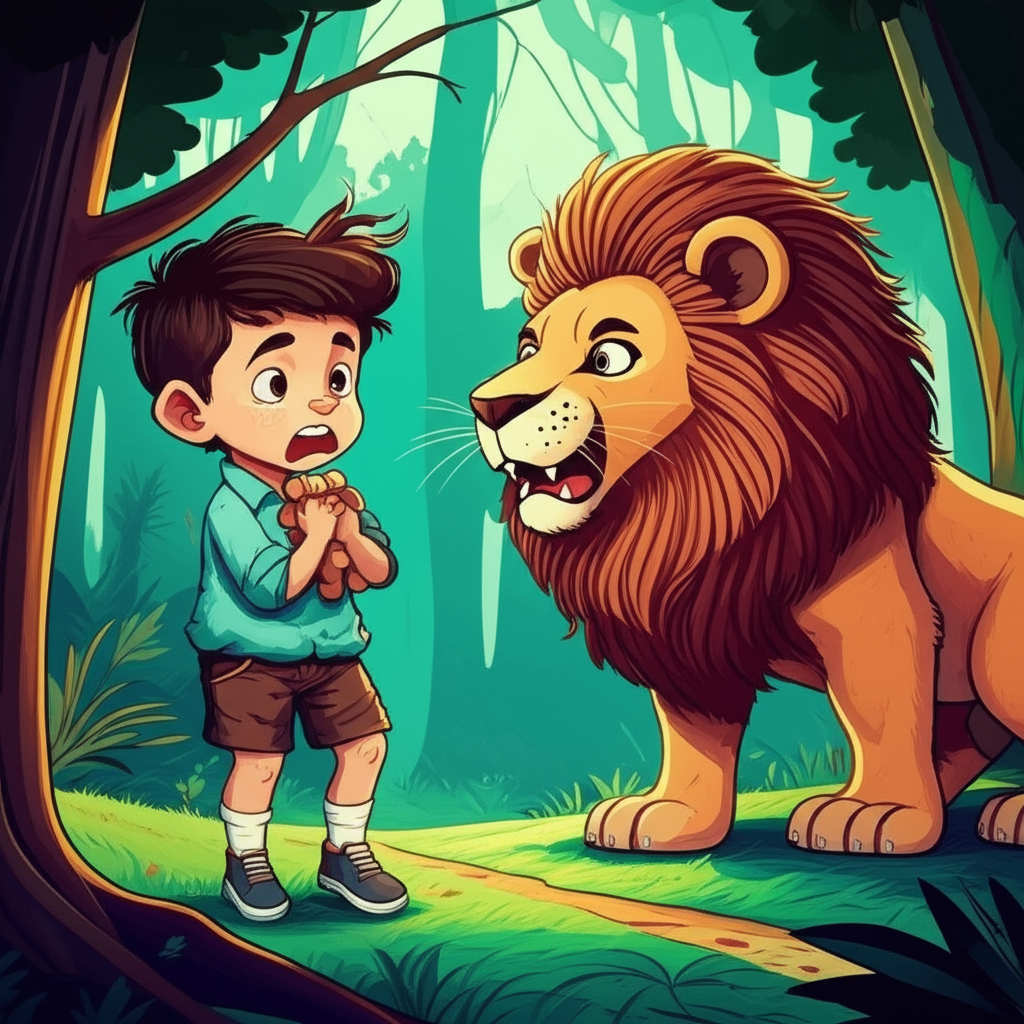

In [15]:
with open("/content/pic.png", "rb") as f:
    image_bytes = f.read()

response = client.models.generate_content(
    model=MODEL_ID,
    contents = [
        Part.from_bytes(
            mime_type="image/png",
            data=image_bytes,
        ),
        "Generate an image of the same boy and bear doudou but in a magic forest. They meet a bad lion. The boy and the bear are very very scared"
    ],
    config=GenerateContentConfig(
        response_modalities=["TEXT", "IMAGE"],
        candidate_count=1,
        safety_settings=[
            {"method": "PROBABILITY"},
            {"category": "HARM_CATEGORY_DANGEROUS_CONTENT"},
            {"threshold": "BLOCK_MEDIUM_AND_ABOVE"},
        ],
    ),
)
for part in response.candidates[0].content.parts:
    if part.text:
        display(Markdown(part.text))
    if part.inline_data:
        display(Image(data=part.inline_data.data, width=350, height=350))

I will generate an image showing the same frightened boy holding his now very large and powerful teddy bear, which is engaged in a fierce fight with the same menacing lion in the forest, protecting the child.



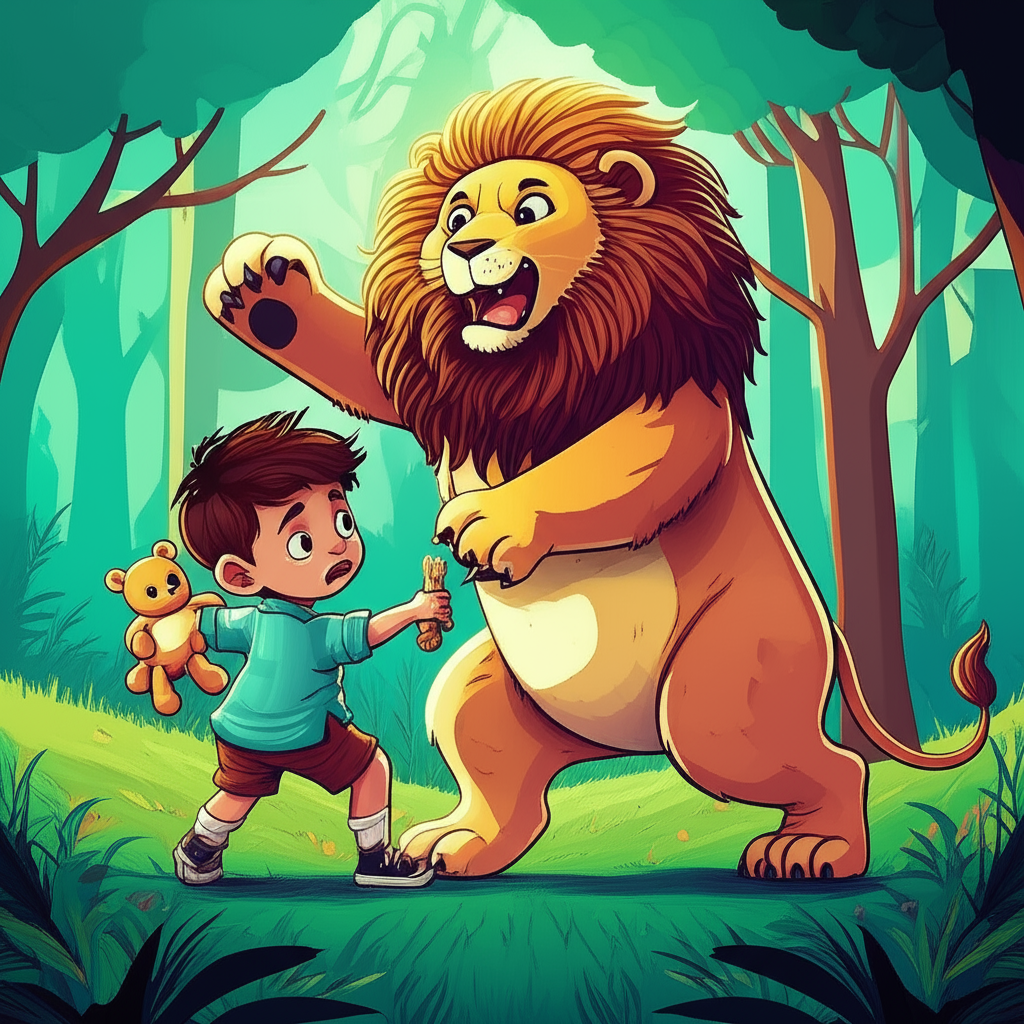

In [26]:
with open("/content/pic_2.png", "rb") as f:
    image_bytes = f.read()

response = client.models.generate_content(
    model=MODEL_ID,
    contents = [
        Part.from_bytes(
            mime_type="image/png",
            data=image_bytes,
        ),
        "Generate an image of a the same boy and his teddy bear (doudou) and the same bad lion. The teddy bear has grown into a very large, powerful bear. The big bear is fighting with the bad lion to protect the boy"
    ],
    config=GenerateContentConfig(
        response_modalities=["TEXT", "IMAGE"],
        candidate_count=1,
        safety_settings=[
            {"method": "PROBABILITY"},
            {"category": "HARM_CATEGORY_DANGEROUS_CONTENT"},
            {"threshold": "BLOCK_MEDIUM_AND_ABOVE"},
        ],
    ),
)
for part in response.candidates[0].content.parts:
    if part.text:
        display(Markdown(part.text))
    if part.inline_data:
        display(Image(data=part.inline_data.data, width=350, height=350))

### Multi-turn image editing

In this next section, you supply a starting image and iteratively alter certain aspects of the image though chatting with Gemini 2.0 Flash.


Run the next step to view the starting image of a vase stored in Google Cloud Storage.

In [ ]:
image_url = (
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/vase.png"
)
display(Image(url=image_url, width=350, height=350))

In [ ]:
chat = client.chats.create(model=MODEL_ID)

response = chat.send_message(
    message=[
        Part.from_uri(
            file_uri="gs://cloud-samples-data/generative-ai/image/vase.png",
            mime_type="image/png",
        ),
        "add sunflowers to this vase",
    ],
    config=GenerateContentConfig(
        response_modalities=["TEXT", "IMAGE"],
    ),
)

for part in response.candidates[0].content.parts:
    if part.text:
        display(Markdown(part.text))
    if part.inline_data:
        display(Image(data=part.inline_data.data, width=350, height=350))

Now, send a new text message to the existing chat asking to update the previously generated image.

In [ ]:
response = chat.send_message(
    message=[
        "change the sunflowers in the vase to pink and purple tulips",
    ],
    config=GenerateContentConfig(
        response_modalities=["TEXT", "IMAGE"],
    ),
)

for part in response.candidates[0].content.parts:
    if part.text:
        display(Markdown(part.text))
    if part.inline_data:
        display(Image(data=part.inline_data.data, width=350, height=350))

### Images and text to image and text

When editing images with Gemini 2.0 Flash, you can also supply multiple input images to create new ones. In this next example, you'll prompt Gemini with an image of a teacup and an outdoor table. You'll then ask Gemini to combine the objects from these images in order to create a new one. You'll also ask Gemini to supply text to accompany the image.


Run the following cell to visualize the starting images of an outdoor table and teacup.

In [ ]:
table_url = (
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/table.png"
)
display(Image(url=table_url, width=300, height=300))

teacup_url = (
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/teacup-1.png"
)
display(Image(url=teacup_url, width=300, height=300))

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        Part.from_uri(
            file_uri="gs://cloud-samples-data/generative-ai/image/table.png",
            mime_type="image/png",
        ),
        Part.from_uri(
            file_uri="gs://cloud-samples-data/generative-ai/image/teacup-1.png",
            mime_type="image/png",
        ),
        "Generate a side profile image of a person sitting at this table drinking out of this teacup in a 1:1 aspect ratio. Include a caption that could be used to post this image on social media.",
    ],
    config=GenerateContentConfig(
        response_modalities=["TEXT", "IMAGE"],
        candidate_count=1,
        safety_settings=[
            {"method": "PROBABILITY"},
            {"category": "HARM_CATEGORY_DANGEROUS_CONTENT"},
            {"threshold": "BLOCK_MEDIUM_AND_ABOVE"},
        ],
    ),
)

for part in response.candidates[0].content.parts:
    if part.text:
        display(Markdown(part.text))
    if part.inline_data:
        display(Image(data=part.inline_data.data, width=350, height=350))